In [ ]:
import pandas as pd

# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


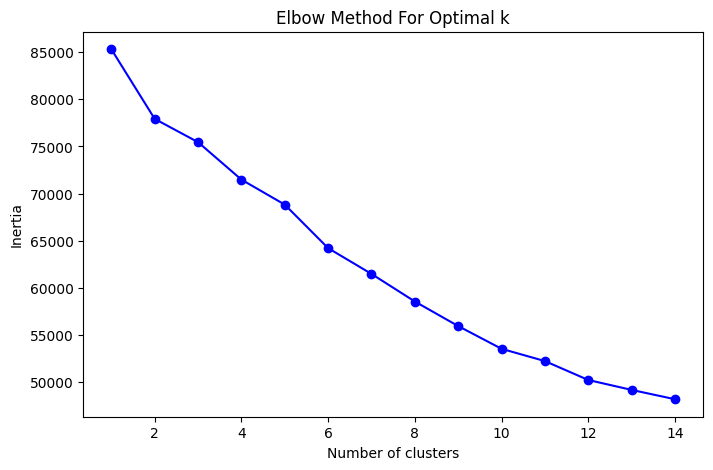

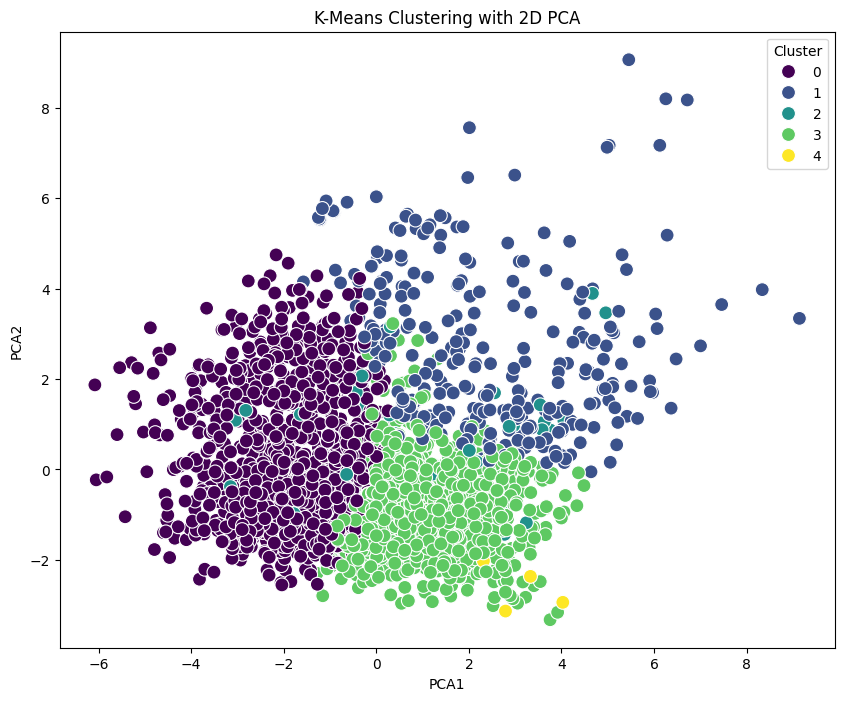

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns that are not useful for clustering
df_numeric = df.drop(columns=['Title'])

# Normalize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the Elbow Method, choose an optimal k (e.g., k=5)
optimal_k = 5

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters (for example, using the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], data=df, palette='viridis', s=100)
plt.title('K-Means Clustering with 2D PCA')
plt.show()

In [5]:
cluster_names = {
    0: 'Mainstream Genre Hits',
    1: 'Acclaimed Crowd-Pleasers',
    2: 'Modern Westerns/Crime',
    3: 'Cult/Arthouse Gems',
    4: 'Issue-Driven Docs'
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

I came up with cluster names by providing deepseek with the cluster_analysis and then using a iterativ process I reprompted deepseek with the clusters and a random movie selection

Issue Driven Docs and Modern Westerns/Crime does not provide new information since it just contains all Movies of Documentaries/News and Western respectivly

In [6]:


# Analyze the clusters
cluster_analysis = df.groupby('Cluster Name')[df_numeric.columns].mean()
cluster_analysis

,Is Series,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
Cluster Name,,,,,,,,,,,,,,,,,,,,,
Acclaimed Crowd-Pleasers,0.026756,3.971572,4.150502,7.728763,85.050167,76.187291,49.886288,90.411371,1.762395e+08,1.470801e+09,...,0.016722,0.013378,0.177258,0.0,0.107023,0.347826,0.006689,0.311037,0.066890,0.0
Cult/Arthouse Gems,0.029358,4.330092,3.510092,7.129541,79.802752,69.190826,11.698165,21.792661,2.432258e+07,1.493230e+09,...,0.066055,0.014679,0.080734,0.0,0.256881,0.033028,0.051376,0.213761,0.070642,0.0
Issue-Driven Docs,0.000000,5.400000,3.000000,7.575000,93.500000,77.750000,11.000000,24.000000,7.288442e+05,1.434629e+09,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Mainstream Genre Hits,0.010290,2.644528,3.263798,6.134238,45.176801,47.276894,3.378859,9.159027,7.189148e+07,1.465500e+09,...,0.013096,0.030870,0.134705,0.0,0.181478,0.181478,0.025257,0.378859,0.015903,0.0
Modern Westerns/Crime,0.021277,3.965957,3.723404,7.114894,78.446809,69.297872,19.914894,50.148936,4.248967e+07,1.492941e+09,...,0.000000,0.000000,0.042553,0.0,0.127660,0.063830,0.000000,0.297872,0.000000,1.0


In [7]:
print(df[['Title', 'Cluster Name']])

                                         Title              Cluster Name
0                             Lets Fight Ghost        Cult/Arthouse Gems
1                          HOW TO BUILD A GIRL        Cult/Arthouse Gems
2                                        Joker  Acclaimed Crowd-Pleasers
3                                            I  Acclaimed Crowd-Pleasers
4                             Harrys Daughters  Acclaimed Crowd-Pleasers
...                                        ...                       ...
2504                            50 First Dates     Mainstream Genre Hits
2505                                        21        Cult/Arthouse Gems
2506                                One Chance        Cult/Arthouse Gems
2507  The Twilight Saga: Breaking Dawn: Part 1     Mainstream Genre Hits
2508                         One for the Money     Mainstream Genre Hits

[2509 rows x 2 columns]


In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.groupby('Cluster Name').apply(lambda x: x.sample(min(len(x), 10)))[['Title']]

C:\Users\jakob\AppData\Local\Temp\ipykernel_16964\2396723821.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Cluster Name').apply(lambda x: x.sample(min(len(x), 10)))[['Title']]


Title
Cluster Name                                                                    
Acclaimed Crowd-Pleasers 1591                           The Grand Budapest Hotel
                         1334                                          Gone Girl
                         1156                            Avengers: Age of Ultron
                         1454                                       Womans Holes
                         820                                       Hacksaw Ridge
                         436                       Mission: Impossible - Fallout
                         1920                                  Midnight in Paris
                         1739                            Star Trek Into Darkness
                         2180                               The Bourne Supremacy
                         2279                                         Spider-Man
Cult/Arthouse Gems       920                                               Court
                         884                              Trouble with the Curve
                         245                                             Ophelia
                         1287                         Curse of the Golden Flower
                         2073                                      Pitch Perfect
                         1379                                       Hope Springs
                         1323                                The Opposite of Sex
                         643                                               Kicks
                         975                                   The Secret Garden
                         1673                                    Velvet Goldmine
Issue-Driven Docs        1629                                      Red Obsession
                         1143                                        Cartel Land
                         2443                                         The Square
                         2419                                          Blackfish
Mainstream Genre Hits    566                                      Justice League
                         1378                                      The Happening
                         757                                               Burnt
                         2482                                       Seven Pounds
                         1136                                       House of Wax
                         1825                                     Basic Instinct
                         901                     I Know What You Did Last Summer
                         1708                                  Ju-on: The Grudge
                         1062                                The Nutty Professor
                         1927                               The Dukes of Hazzard
Modern Westerns/Crime    1400                               Saving Private Perez
                         994   The Assassination of Jesse James by the Coward...
                         637                                           Silverado
                         2156                       Once Upon a Time in the West
                         2432                     The Good, the Bad and the Ugly
                         122              High & Low The Movie 3 / Final Mission
                         1157                                  The Mask of Zorro
                         1147                                          Slow West
                         1297                                     Wild Wild West
                         90                                             The Hero

In [9]:

df.sort_values(by='Cluster',ascending=True)[['Title', 'Cluster Name']]

,Title,Cluster Name
2499,Sex and the City 2,Mainstream Genre Hits
2466,Act of Valour,Mainstream Genre Hits
2465,Sex and the City: The Movie,Mainstream Genre Hits
2464,A Walk to Remember,Mainstream Genre Hits
1161,The Longest Ride,Mainstream Genre Hits
1159,Last Action Hero,Mainstream Genre Hits
22,Sonic the Hedgehog,Mainstream Genre Hits
2453,Pineapple Express,Mainstream Genre Hits
1154,Trash,Mainstream Genre Hits
1152,Big Game,Mainstream Genre Hits
